In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

/home/kevin/lib/anaconda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
boston_dataset = datasets.load_boston()
X_full = boston_dataset.data
Y = boston_dataset.target
print(X_full.shape)
print(Y.shape)

(506, 13)
(506,)


In [3]:
selector = SelectKBest(f_regression, k=1)
selector.fit(X_full, Y)
X = X_full[:, selector.get_support()]
print(X.shape)

(506, 1)


In [6]:
def plot_scatter(X, Y, R=None):
    plt.scatter(X, Y, s=32, marker='o', facecolors='green')
    if R is not None:
        plt.scatter(X, R, color='red', linewidth=0.5)
    plt.show()

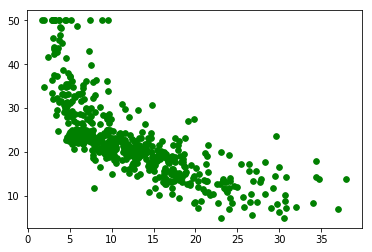

In [7]:
plot_scatter(X, Y)

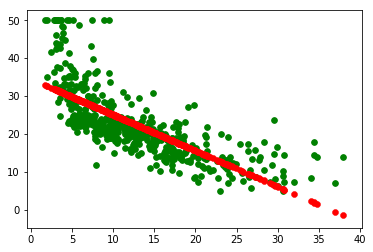

In [8]:
regressor = LinearRegression(normalize=True).fit(X, Y)
plot_scatter(X, Y, regressor.predict(X))

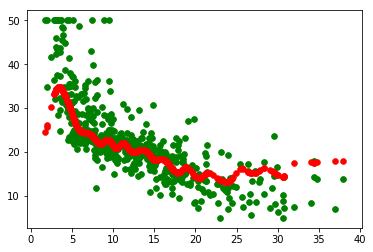

In [9]:
regressor = SVR().fit(X, Y)
plot_scatter(X, Y, regressor.predict(X))

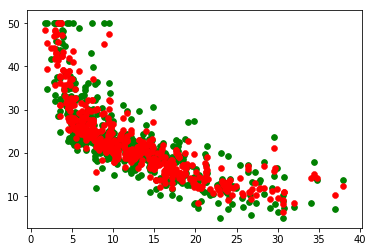

In [10]:
regressor = RandomForestRegressor().fit(X, Y)
plot_scatter(X, Y, regressor.predict(X))

In [11]:
from sklearn.datasets import fetch_mldata
earthquakes = fetch_mldata('global-earthquakes')
print(earthquakes.data)
print(earthquakes.data.shape)

HTTPError: HTTP Error 500: Internal Server Error

In [12]:
X, y = datasets.make_classification(n_samples=10**6,
                                   n_features=10, random_state=101)
print(X.shape, y.shape)

(1000000, 10) (1000000,)


In [13]:
datasets.make_classification(1, n_features=4, random_state=101)

(array([[-3.31994186, -2.39469384, -2.35882002,  1.40145585]]), array([0]))

In [15]:
%timeit X, y = datasets.make_classification(n_samples=10**6, n_features=10, random_state=101)

799 ms ± 12.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
